# Лабораторная работа №3

### Набор данных "Наблюдения НЛО в США"

In [1]:
#  Для набора данных "Наблюдения НЛО в США" можно выделить несколько бизнес-целей и соответствующие технические задачи. Давайте рассмотрим этот процесс поэтапно.
#  
#  1. Определение бизнес-целей
#      Бизнес-цель 1: Прогнозирование местоположения и частоты наблюдений НЛО.
#          Задача заключается в анализе географического распределения и времени наблюдений НЛО, чтобы определить, в каких местах и когда чаще всего происходят наблюдения.
#      Бизнес-цель 2: Анализ факторов, влияющих на восприятие НЛО (например, форма, продолжительность, описание).
#          Цель — понять, какие признаки, такие как форма НЛО, длительность наблюдения, могут быть связаны с более подробными или более эмоционально окрашенными отчетами.
#  2. Цели технического проекта для каждой бизнес-цели
#      Цель для бизнес-цели 1: Создать модель, которая предскажет вероятное местоположение и время наблюдений на основе данных о предыдущих наблюдениях.
#          Технические задачи:
#              Прогнозирование местоположения и времени (классификация или регрессия).
#              Кластеризация по географическому положению.
#              Анализ временных рядов для выявления сезонных колебаний.
#      Цель для бизнес-цели 2: Анализировать текстовые описания наблюдений НЛО для выявления ключевых паттернов и факторов.
#          Технические задачи:
#              Анализ текста с использованием методов обработки естественного языка (NLP).
#              Классификация описаний по типам объектов или возможным объяснениям (например, возможный самолет или атмосферное явление).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Загрузка данных
df = pd.read_csv("../../datasets/nuforc_reports.csv")

# Срез данных, первые 15000 строк
df = df.iloc[:15000]

# Вывод
print(df.columns)

Index(['summary', 'city', 'state', 'date_time', 'shape', 'duration', 'stats',
       'report_link', 'text', 'posted', 'city_latitude', 'city_longitude'],
      dtype='object')


In [3]:
# Для наглядности
df.head()

summary        city state  \
0  Viewed some red lights in the sky appearing to...     Visalia    CA   
1  Look like 1 or 3 crafts from North traveling s...  Cincinnati    OH   
2  seen dark rectangle moving slowly thru the sky...      Tecopa    CA   
3  One red light moving switly west to east, beco...   Knoxville    TN   
4  Bright, circular Fresnel-lens shaped light sev...  Alexandria    VA   

             date_time      shape         duration  \
0  2021-12-15T21:45:00      light        2 minutes   
1  2021-12-16T09:45:00   triangle       14 seconds   
2  2021-12-10T00:00:00  rectangle  Several minutes   
3  2021-12-10T19:30:00   triangle    20-30 seconds   
4  2021-12-07T08:00:00     circle              NaN   

                                               stats  \
0  Occurred : 12/15/2021 21:45  (Entered as : 12/...   
1  Occurred : 12/16/2021 09:45  (Entered as : 12/...   
2  Occurred : 12/10/2021 00:00  (Entered as : 12/...   
3  Occurred : 12/10/2021 19:30  (Entered as : 12/...   
4  Occurred : 12/7/2021 08:00  (Entered as : 12/0...   

                                         report_link  \
0  http://www.nuforc.org/webreports/165/S165881.html   
1  http://www.nuforc.org/webreports/165/S165888.html   
2  http://www.nuforc.org/webreports/165/S165810.html   
3  http://www.nuforc.org/webreports/165/S165825.html   
4  http://www.nuforc.org/webreports/165/S165754.html   

                                                text               posted  \
0  Viewed some red lights in the sky appearing to...  2021-12-19T00:00:00   
1  Look like 1 or 3 crafts from North traveling s...  2021-12-19T00:00:00   
2  seen dark rectangle moving slowly thru the sky...  2021-12-19T00:00:00   
3  One red light moving switly west to east, beco...  2021-12-19T00:00:00   
4  Bright, circular Fresnel-lens shaped light sev...  2021-12-19T00:00:00   

   city_latitude  city_longitude  
0      36.356650     -119.347937  
1      39.174503      -84.481363  
2            NaN             NaN  
3      35.961561      -83.980115  
4      38.798958      -77.095133

In [4]:
# Описание данных (основные статистические показатели)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         14998 non-null  object 
 1   city            14961 non-null  object 
 2   state           14235 non-null  object 
 3   date_time       14560 non-null  object 
 4   shape           13082 non-null  object 
 5   duration        13598 non-null  object 
 6   stats           15000 non-null  object 
 7   report_link     15000 non-null  object 
 8   text            14999 non-null  object 
 9   posted          14560 non-null  object 
 10  city_latitude   12002 non-null  float64
 11  city_longitude  12002 non-null  float64
dtypes: float64(2), object(10)
memory usage: 1.4+ MB


Количество пропущенных значений в каждом столбце:
summary              74
city                382
state              9345
date_time          2668
shape              5922
duration           6492
stats                 0
report_link           0
text                 38
posted             2668
city_latitude     26804
city_longitude    26804
dtype: int64
summary Процент пустых значений: %0.05
city Процент пустых значений: %0.28
state Процент пустых значений: %6.82
date_time Процент пустых значений: %1.95
shape Процент пустых значений: %4.32
duration Процент пустых значений: %4.74
text Процент пустых значений: %0.03
posted Процент пустых значений: %1.95
city_latitude Процент пустых значений: %19.57
city_longitude Процент пустых значений: %19.57
Количество выбросов в столбце 'city_latitude': 1025
Количество выбросов в столбце 'city_longitude': 23


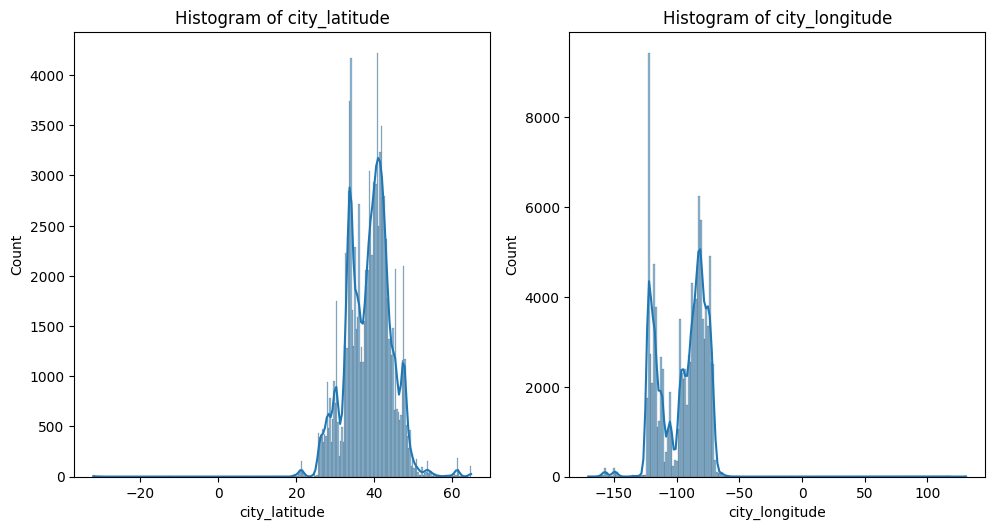

Количество удаленных строк: 27832
Количество выбросов в столбце 'city_latitude': 38
Количество выбросов в столбце 'city_longitude': 0


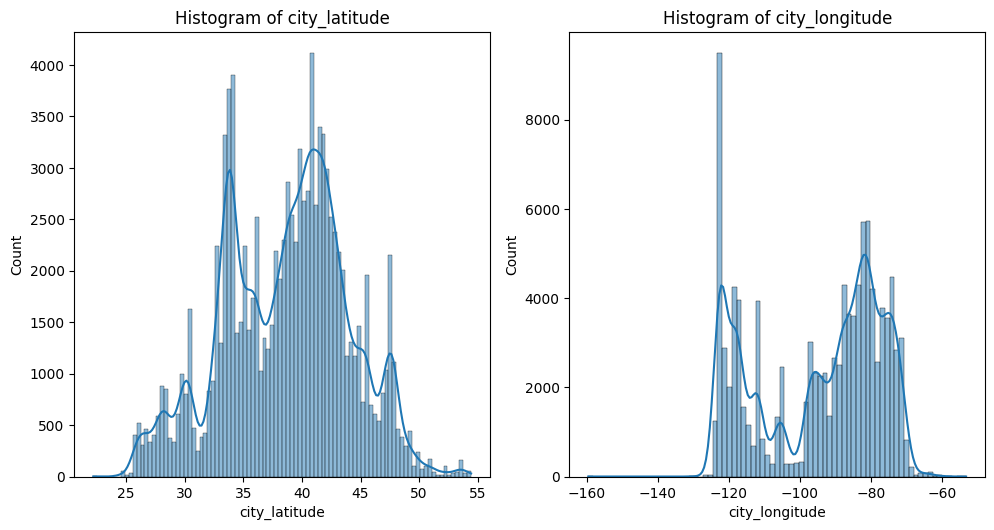

Средняя цена в обучающей выборке: 38.655686510239775
Средняя цена в контрольной выборке: 38.6586177634688
Средняя цена в тестовой выборке: 38.61544768163524

Стандартное отклонение цены в обучающей выборке: 5.380551235399826
Стандартное отклонение цены в контрольной выборке: 5.34170765011401
Стандартное отклонение цены в тестовой выборке: 5.3932492782181525

Распределение по квартилам (обучающая):
0.25    34.269424
0.50    39.222500
0.75    42.284678
Name: city_latitude, dtype: float64

Распределение по квартилам (контрольная):
0.25    34.286571
0.50    39.302247
0.75    42.277381
Name: city_latitude, dtype: float64

Распределение по квартилам (тестовая):
0.25    34.194501
0.50    39.165900
0.75    42.286500
Name: city_latitude, dtype: float64


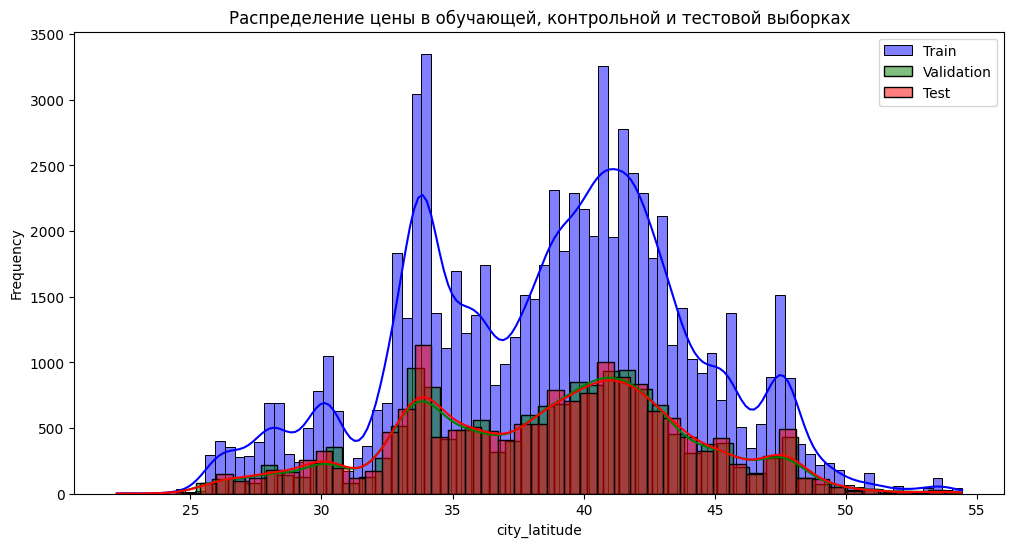

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv("../../datasets/nuforc_reports.csv")


#5. Устранение пропущенных данных
    
#Сведения о пропущенных данных
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')



#6. Проблемы набора данных
    #5.1Выбросы: Возможны аномалии в значениях скорости или расстояния.
    #Смещение: Данные могут быть смещены в сторону объектов, которые легче обнаружить (крупные, близкие).

#7. Решения для обнаруженных проблем
    #Выбросы: Идентификация и обработка выбросов через методы (например, IQR или Z-оценка).
    #Смещение: Использование методов балансировки данных, таких как oversampling.

#7.1 Проверка набора данных на выбросы
# Выбираем столбцы для анализа
columns_to_check = df.select_dtypes(include=np.number).columns.tolist()#['city_latitude'  , 'sqft_living', 'bathrooms', 'yr_built']
def Emissions(columns_to_check):

    # Функция для подсчета выбросов
    def count_outliers(df, columns):
        outliers_count = {}
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Считаем количество выбросов
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_count[col] = len(outliers)
        
        return outliers_count

    # Подсчитываем выбросы
    outliers_count = count_outliers(df, columns_to_check)

    # Выводим количество выбросов для каждого столбца
    for col, count in outliers_count.items():
        print(f"Количество выбросов в столбце '{col}': {count}")
        
    # Создаем гистограммы
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns_to_check, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
Emissions(columns_to_check)

#Признак miss_distance не имеет выбросов, 
#признак absolute_magnitude имеет количество выбросов в приемлемом диапазоне
#для признаков est_diameter_min, est_diameter_max и relative_velocity необходимо использовать метод решения проблемы выбросов. 
#Воспользуемся методом удаления наблюдений с такими выбросами:
# Выбираем столбцы для очистки
columns_to_clean = ['city_latitude']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

#Оценим выбросы в выборке после усреднения:
Emissions(columns_to_clean)

#Удалось избавиться от выбросов в соответствующих признаках как видно на диаграммах.



#8. Разбиение данных на выборки

from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Средние значения цены
print("Средняя цена в обучающей выборке:", train_data['city_latitude'  ].mean())
print("Средняя цена в контрольной выборке:", val_data['city_latitude'  ].mean())
print("Средняя цена в тестовой выборке:", test_data['city_latitude'  ].mean())
print()

# Стандартное отклонение цены
print("Стандартное отклонение цены в обучающей выборке:", train_data['city_latitude'  ].std())
print("Стандартное отклонение цены в контрольной выборке:", val_data['city_latitude'  ].std())
print("Стандартное отклонение цены в тестовой выборке:", test_data['city_latitude'  ].std())
print()

# Проверка распределений по количеству объектов в диапазонах
print("Распределение по квартилам (обучающая):")
print(train_data['city_latitude'  ].quantile([0.25, 0.5, 0.75]))
print()
print("Распределение по квартилам (контрольная):")
print(val_data['city_latitude'  ].quantile([0.25, 0.5, 0.75]))
print()
print("Распределение по квартилам (тестовая):")
print(test_data['city_latitude'  ].quantile([0.25, 0.5, 0.75]))

# Построение гистограмм для каждой выборки
plt.figure(figsize=(12, 6))

sns.histplot(train_data['city_latitude'  ], color='blue', label='Train', kde=True)
sns.histplot(val_data['city_latitude'  ], color='green', label='Validation', kde=True)
sns.histplot(test_data['city_latitude'  ], color='red', label='Test', kde=True)

plt.legend()
plt.xlabel('city_latitude'  )
plt.ylabel('Frequency')
plt.title('Распределение цены в обучающей, контрольной и тестовой выборках')
plt.show()


#9. Оценить  сбалансированность  выборок  для  каждого  набора  данных.  Оценить необходимость использования методов приращения (аугментации) данных. 
#Выводы по сбалансированности
#Если распределение классов примерно равно (например, 50%/50%), выборка считается сбалансированной, и аугментация данных не требуется.
#Если один из классов сильно доминирует (например, 90%/10%), выборка несбалансированная, и может потребоваться аугментация данных.

#Выборки оказались недостаточно сбалансированными. Используем методы приращения данных с избытком и с недостатком:



Нет пропущенных данных.

### Разбиваем на выборки (обучающую, тестовую, контрольную)

Размеры выборок:
Обучающая выборка: 65464 записей
Валидационная выборка: 21822 записей
Тестовая выборка: 21822 записей


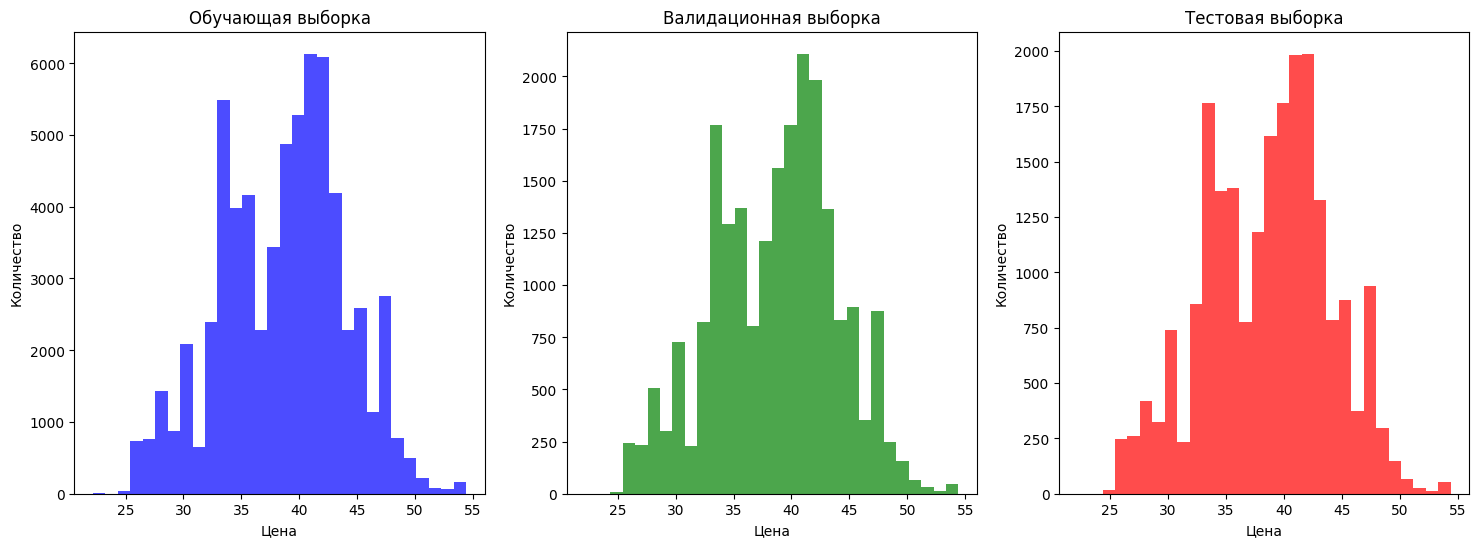

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Разделение признаков (features) и целевой переменной (target)
X = df.drop(columns=['city_latitude'])  # Признаки (все столбцы, кроме 'city_latitude')
y = df['city_latitude'] 
# Целевая переменная (price)

# Разбиение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Валидационная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

# Визуализация распределения цен в каждой выборке
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Обучающая выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
plt.hist(y_val, bins=30, color='green', alpha=0.7)
plt.title('Валидационная выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.subplot(1, 3, 3)
plt.hist(y_test, bins=30, color='red', alpha=0.7)
plt.title('Тестовая выборка')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.show()

**Балансировка выборок**

Размеры выборок:
Обучающая выборка: 6000 записей
Валидационная выборка: 2000 записей
Тестовая выборка: 2000 записей


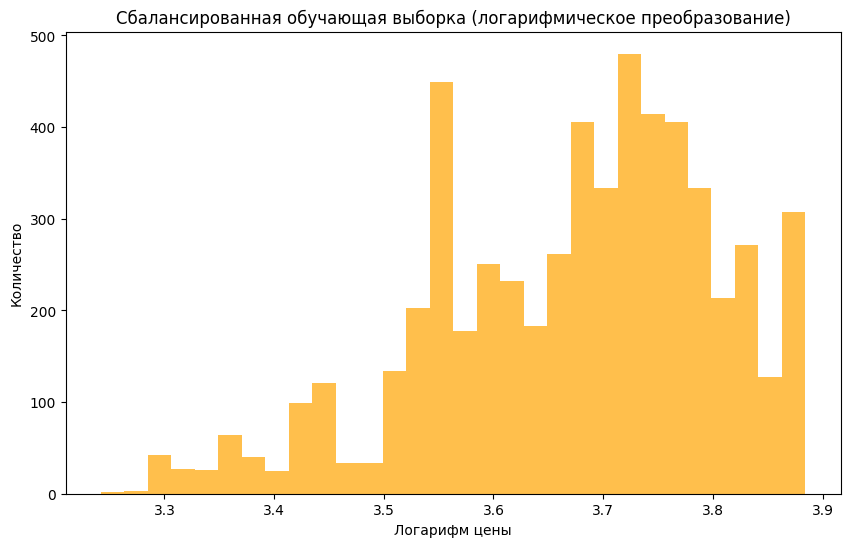

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Разделение признаков (features) и целевой переменной (target)
X = df.drop(columns=['city_latitude']).head(10000)  # Признаки (все столбцы, кроме 'city_latitude')
y = df['city_latitude'].head(10000)  # Целевая переменная (цена)

# Применение one-hot encoding для категориальных признаков
X = pd.get_dummies(X, drop_first=True)

# Разбиение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Валидационная выборка: {X_val.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

# Удаление выбросов (цены выше 95-го процентиля)
upper_limit = y_train.quantile(0.95)
X_train = X_train[y_train <= upper_limit]
y_train = y_train[y_train <= upper_limit]

# Логарифмическое преобразование целевой переменной
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Визуализация распределения цен в сбалансированной выборке
plt.figure(figsize=(10, 6))
plt.hist(y_train_log, bins=30, color='orange', alpha=0.7)
plt.title('Сбалансированная обучающая выборка (логарифмическое преобразование)')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество')
plt.show()

**Унитарное кодирование категориальных признаков**

In [8]:
print("Данные до унитарного кодирования:")
print(df.head(10000))

# Применение унитарного кодирования для категориальных признаков
df_encoded = pd.get_dummies(df.head(10000), drop_first=True)

print("\nДанные после унитарного кодирования:")
print(df_encoded.head(10000))

Данные до унитарного кодирования:
                                                 summary           city state  \
0      Viewed some red lights in the sky appearing to...        Visalia    CA   
1      Look like 1 or 3 crafts from North traveling s...     Cincinnati    OH   
3      One red light moving switly west to east, beco...      Knoxville    TN   
4      Bright, circular Fresnel-lens shaped light sev...     Alexandria    VA   
5      I'm familiar with all the fakery and UFO sight...      Fullerton    CA   
...                                                  ...            ...   ...   
12494                    star like stop and go satellite  San Francisco    CA   
12495           Two Balls of Light sighted in Tulsa, Ok.          Tulsa    OK   
12496  Highley reflective silver oval/disk seen in sk...       St Louis    MO   
12497  While walking on broadwalk on south west corne...          Tempe    AZ   
12498  was sitting on my front porch with granddaught...        Elkhart    

**Дискретизация числовых признаков**

In [9]:
print(df['city_latitude'].min())
print(df['city_latitude'].max())
print(df['city_latitude'].max() - df['city_latitude'].min())

22.1938
54.4333
32.23950000000001


In [10]:
print("Данные до дискретизации:")
#print(df.head(10))


# Определение интервалов и меток для дискретизации
bins = [
round(df['city_latitude'].min() + df['city_latitude'].max() * 0), 
round(df['city_latitude'].min() + df['city_latitude'].max() * 0.25), 
round(df['city_latitude'].min() + df['city_latitude'].max() * 0.50), 
round(df['city_latitude'].min() + df['city_latitude'].max() * 0.75),
round(df['city_latitude'].min() + df['city_latitude'].max() * 1),
float('inf')
]
print(bins)
labels = [
str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0)) + '-' + str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0.25)),
str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0.25)) + '-' + str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0.5)),
str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0.5)) + '-' + str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0.75)),
str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0.75)) + '-' + str(round(df['city_latitude'].min() + df['city_latitude'].max() * 0.1)),
str(round(df['city_latitude'].min() + df['city_latitude'].max() * 1)) + '+'
]

# Применение дискретизации
df['price_bins'] = pd.cut(df['city_latitude'], bins=bins, labels=labels, right=False)

print("\nДанные после дискретизации:")
print(df[['city_latitude', 'price_bins']].head(10))

Данные до дискретизации:
[22, 36, 49, 63, 77, inf]

Данные после дискретизации:
    city_latitude price_bins
0       36.356650      36-49
1       39.174503      36-49
3       35.961561      22-36
4       38.798958      36-49
5       33.877422      22-36
6       36.141246      36-49
8       40.294123      36-49
10      40.698700      36-49
12      44.072800      36-49
13      42.312800      36-49


**«Ручной» синтез признаков**

Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, для данных о продаже домов можно создать признак цена за единицу товара.

In [11]:
# Проверка первых строк данных
print("Данные до синтеза признака:")
print(df.head(10))

# Вычисление средней цены по категориям
mean_price_by_category = df.groupby('state')['city_latitude'].transform('mean')

# Создание нового признака 'relative_price' (относительная цена)
df['relative_appearing'] = df['city_latitude'] / mean_price_by_category

# Проверка первых строк данных после синтеза признака
print("\nДанные после синтеза признака 'relative_price':")
print(df[['city_latitude', 'state', 'relative_appearing']].head(10))

Данные до синтеза признака:
                                              summary         city state  \
0   Viewed some red lights in the sky appearing to...      Visalia    CA   
1   Look like 1 or 3 crafts from North traveling s...   Cincinnati    OH   
3   One red light moving switly west to east, beco...    Knoxville    TN   
4   Bright, circular Fresnel-lens shaped light sev...   Alexandria    VA   
5   I'm familiar with all the fakery and UFO sight...    Fullerton    CA   
6   I was driving up lakes mead towards the lake a...    Las Vegas    NV   
8   Wing shaped craft seen at night, no lights, no...         Orem    UT   
10  Yellow light floating across my grass as it de...  Springfield    NJ   
12  A trail of star like lights moving from the W....   Janesville    MN   
13  Large bright ball not registering on any app a...       Bangor    MI   

              date_time     shape       duration  \
0   2021-12-15T21:45:00     light      2 minutes   
1   2021-12-16T09:45:00  triang

**Масштабирование признаков на основе нормировки и стандартизации**

Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Создание нового признака 'relative_city_latitude' (цена относительно средней цены в категории)
mean_city_latitude_by_state = df.groupby('state')['city_latitude'].transform('mean')
df['relative_city_latitude'] = df['city_latitude'] / mean_city_latitude_by_state

# Проверка первых строк данных до масштабирования
print("Данные до масштабирования:")
print(df[['city_latitude', 'relative_city_latitude']].head())

# Масштабирование признаков на основе нормировки
min_max_scaler = MinMaxScaler()
df[['city_latitude', 'relative_city_latitude']] = min_max_scaler.fit_transform(df[['city_latitude', 'relative_city_latitude']])

# Проверка первых строк данных после нормировки
print("\nДанные после нормировки:")
print(df[['city_latitude', 'relative_city_latitude']].head())

# Стандартизация признаков
standard_scaler = StandardScaler()
df[['city_latitude', 'relative_city_latitude']] = standard_scaler.fit_transform(df[['city_latitude', 'relative_city_latitude']])

# Проверка первых строк данных после стандартизации
print("\nДанные после стандартизации:")
print(df[['city_latitude', 'relative_city_latitude']].head())

Данные до масштабирования:
   city_latitude  relative_city_latitude
0      36.356650                1.018610
1      39.174503                0.969926
3      35.961561                1.001705
4      38.798958                1.026087
5      33.877422                0.949149

Данные после нормировки:
   city_latitude  relative_city_latitude
0       0.439301                0.475114
1       0.526705                0.349452
3       0.427046                0.431477
4       0.515056                0.494412
5       0.362401                0.295823

Данные после стандартизации:
   city_latitude  relative_city_latitude
0      -0.426560                0.533974
1       0.097536               -0.862875
3      -0.500043                0.048911
4       0.027688                0.748491
5      -0.887675               -1.459012


**Конструирование признаков с применением фреймворка Featuretools**

In [13]:
import featuretools as ft

# Создание нового признака 'relative_city_latitude'
mean_city_latitude_by_state = df.groupby('state')['city_latitude'].transform('mean')
df['relative_city_latitude'] = df['city_latitude'] / mean_city_latitude_by_state

# Создание EntitySet
es = ft.EntitySet(id='jio_mart_items')

# Добавление данных с явным указанием индексного столбца
es = es.add_dataframe(dataframe_name='items_data', dataframe=df, index='index', make_index=True)

# Конструирование признаков
features, feature_defs = ft.dfs(entityset=es, target_dataframe_name='items_data', verbose=True)

# Проверка первых строк новых признаков
print("Новые признаки, созданные с помощью Featuretools:")
print(features.head())

c:\Users\tumvu\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\tumvu\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\tumvu\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\tumvu\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\

Built 23 features
Elapsed: 00:14 | Progress:  95%|█████████▌

c:\Users\tumvu\AppData\Local\Programs\Python\Python312\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.replace(ww.config.get_option("nan_values"), np.nan)


Elapsed: 00:17 | Progress: 100%|██████████
Новые признаки, созданные с помощью Featuretools:
             city state     shape       duration  city_latitude  \
index                                                             
0         Visalia    CA     light      2 minutes      -0.426560   
1      Cincinnati    OH  triangle     14 seconds       0.097536   
2       Knoxville    TN  triangle  20-30 seconds      -0.500043   
3      Alexandria    VA    circle            NaN       0.027688   
4       Fullerton    CA   unknown      2 minutes      -0.887675   

       city_longitude price_bins  relative_appearing  relative_city_latitude  \
index                                                                          
0         -119.347937      36-49            1.018610                0.775416   
1          -84.481363      36-49            0.969926                0.301550   
2          -83.980115      22-36            1.001705                0.977744   
3          -77.095133      36-49     

**Оценка качества**

*Предсказательная способность Метрики:* RMSE, MAE, R²  

*Методы:* Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.  

*Скорость вычисления Методы:* Измерение времени выполнения генерации признаков и обучения модели.  

*Надежность Методы:* Кросс-валидация, анализ чувствительности модели к изменениям в данных.  

*Корреляция Методы:* Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.  

*Цельность Методы:* Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.  

c:\Users\tumvu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 1.5489449749619157
R²: 0.924423816721939
MAE: 0.46826566221280963
Training Time: 37.429771184921265 seconds
Cross-validated RMSE: 1.535611497565107


C:\Users\tumvu\AppData\Local\Temp\ipykernel_54788\399707436.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')


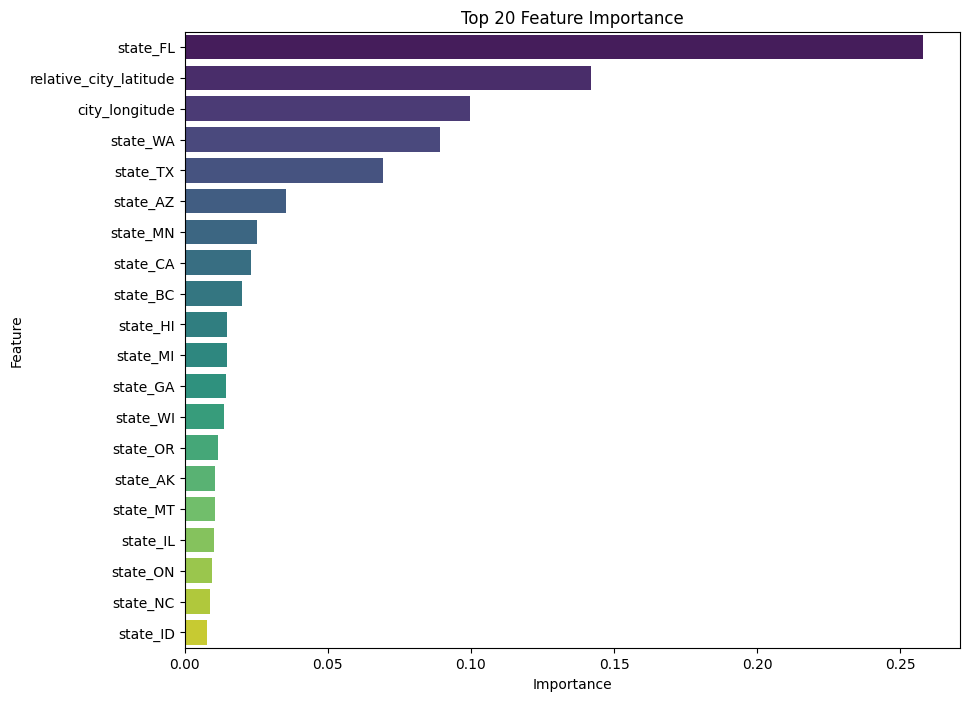

Train RMSE: 0.4358844786848851
Train R²: 0.994185027626814
Train MAE: 0.12184558416960284
Корреляция: 0.96


c:\Users\tumvu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


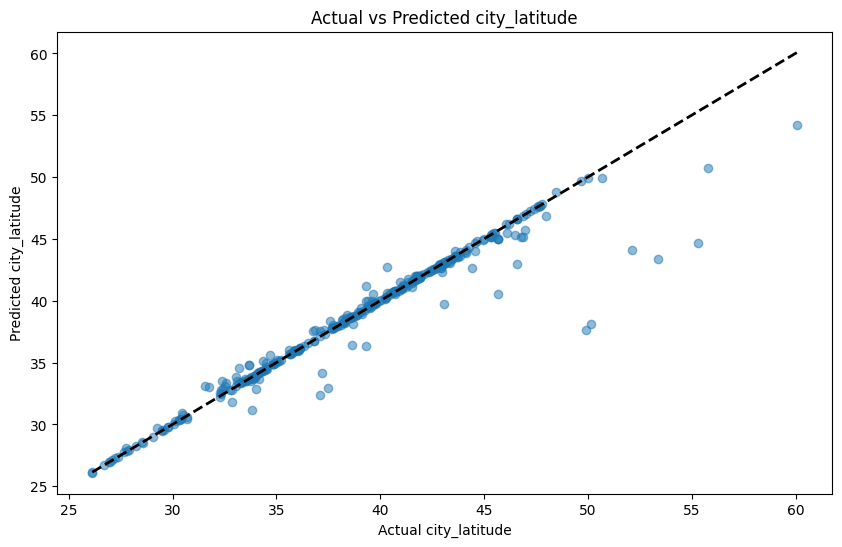

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Загрузка данных
df = pd.read_csv("../../datasets/nuforc_reports.csv").head(2000)

# Создание нового признака 'relative_city_latitude'
mean_city_latitude_by_state = df.groupby('state')['city_latitude'].transform('mean')
df['relative_city_latitude'] = df['city_latitude'] / mean_city_latitude_by_state

# Предобработка данных
# Преобразуем категориальные переменные в числовые
df = pd.get_dummies(df, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = df.drop('city_latitude', axis=1).dropna()
y = df['city_latitude'].dropna()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Измерение времени обучения и предсказания
start_time = time.time()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"Training Time: {training_time} seconds")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Отобразим только топ-20 признаков
top_n = 20
importance_df_top = importance_df.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_top, palette='viridis')
plt.title(f'Top {top_n} Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")

correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Корреляция: {correlation:.2f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual city_latitude')
plt.ylabel('Predicted city_latitude')
plt.title('Actual vs Predicted city_latitude')
plt.show()

# Выводы и итог  

**Время обучения:**

Время обучения модели составляет 37 секунды, что является средним. Это указывает на то, что модель обучается быстро и может эффективно обрабатывать данные.

**Предсказательная способность:**

MAE (Mean Absolute Error): 0.12184558416960284 — это средняя абсолютная ошибка предсказаний модели. Значение MAE  невелико, что означает, что предсказанные значения в среднем отклоняются от реальных на 0.12184558416960284. Это может быть приемлемым уровнем ошибки.

RMSE (Mean Squared Error): 0.4358844786848851 — это среднее значение квадратов ошибок.

R² (коэффициент детерминации): 0.994185027626814 — это средний уровень, указывающий на то, что модель объясняет 99,4% вариации целевой переменной. Это свидетельствует о средней предсказательной способности модели.

**Корреляция:**

Корреляция (0.96) между предсказанными и реальными значениями говорит о том, что предсказания модели имеют  сильную линейную зависимость с реальными значениями. Это подтверждает, что модель хорошо обучена и делает точные прогнозы.

**Надежность (кросс-валидация):**

Среднее RMSE (кросс-валидация): 1.535611497565107 — это значительно ниже, чем обычное RMSE, что указывает на отсутствие проблем с переобучением - что и подтверждается тестом переобучением. 

Результаты визуализации важности признаков, полученные из линейной регрессии, помогают понять, какие из входных переменных наибольшим образом влияют на целевую переменную (city_latitude).